In [8]:
import csv
import numpy as np
from scipy.signal import find_peaks, find_peaks_cwt, argrelextrema, argrelextrema
import matplotlib.pyplot as plt


def read_oxcgrt(filename):
    data = {}
    with open(filename) as oxcgrt_in:
        csv_reader = csv.reader(oxcgrt_in)
        cname_idx, rname_idx, cc_idx, cd_idx, date_idx = 0,0,0,0,0
        for idx,row in enumerate(csv_reader):
            if idx == 0:
                cname_idx = row.index('CountryName')
                rname_idx = row.index('RegionName')
                cc_idx = row.index('ConfirmedCases')
                date_idx = row.index('Date')
            else:
                cname = row[cname_idx]
                rname = row[rname_idx]
                case = int(float(row[cc_idx])) if row[cc_idx] != '' else 0 

                key = cname if rname == '' else rname
                if key not in data:
                    data[key] = {}
                    data[key]['case'] = []

                data[key]['case'].append(case)
                #data[key]['death'].append(death)
    return data

data = read_oxcgrt('XPrize_Complete_Final_Data.csv')
print(data['Canada'])

18
{'case': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 10, 11, 11, 13, 14, 20, 24, 27, 30, 33, 37, 49, 54, 64, 77, 79, 108, 117, 193, 198, 252, 415, 478, 657, 800, 943, 1277, 1469, 2088, 2790, 3251, 4042, 4682, 5576, 6280, 7398, 8527, 9560, 11284, 12437, 12978, 15756, 16563, 17872, 19141, 20654, 22059, 23316, 24299, 25680, 27035, 28209, 30809, 32814, 34356, 35633, 37658, 39402, 41663, 43299, 44919, 46371, 48033, 49616, 51150, 52865, 54457, 56343, 57926, 60504, 61957, 63215, 64694, 66201, 67674, 68918, 70091, 71264, 72419, 73568, 74781, 75959, 77206, 78332, 79411, 80493, 81575, 82742, 83947, 85151, 86106, 87119, 88090, 88989, 89976, 90909, 91681, 92479, 93288, 93960, 94641, 95269, 95947, 96475, 97178, 97779, 98241, 98720, 99159, 99595, 100043, 100404, 100763, 101087, 101491, 101877, 102314, 102762, 103078, 103418, 103767, 104087, 104463, 104629, 104878, 105193, 105830,

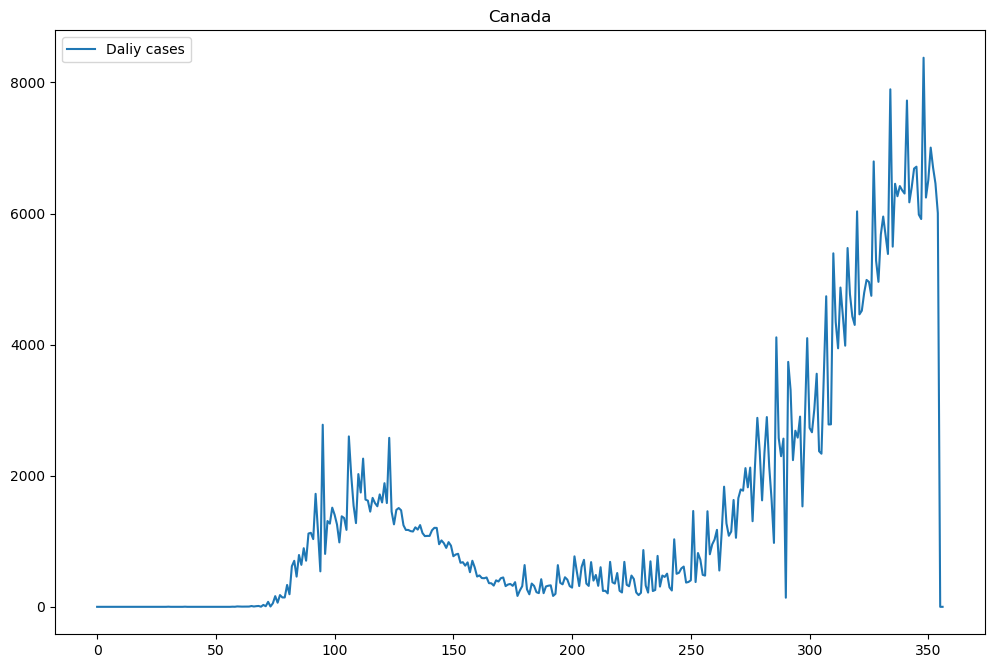

In [10]:
def draw_graph(data, country_or_region_code):
    cor_daily_cases = np.ediff1d(np.array(data[country_or_region_code]['case']))
    cor_daily_cases = np.insert(cor_daily_cases, 0, data[country_or_region_code]['case'][0], axis=0)
    cor_daily_cases[cor_daily_cases < 0] = 0
    fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.title(country_or_region_code)
    plt.plot(cor_daily_cases,  label = 'Daliy cases')
    plt.legend()

#draw_graph(data, 'Canada')

for country_or_region in data:
    draw_graph(data, country_or_region)
    

In [5]:
def compute(data, country_or_region_code):
    R0 = 5.7
    cor_daily_cases = np.ediff1d(np.array(data[country_or_region_code]['case']))
    cor_daily_cases = np.insert(cor_daily_cases, 0, data[country_or_region_code]['case'][0], axis=0)
    # fill negative with 0, this can occurs for the last row or rows in the data
    # where latest data is not avaibale 
    cor_daily_cases[cor_daily_cases < 0] = 0
    peak_idx = argrelextrema(cor_daily_cases, np.greater)[0] 

    for x in peak_idx:    
        if cor_daily_cases[x-1] == 0 or cor_daily_cases[x] < 50:
            continue
        if  cor_daily_cases[x]/cor_daily_cases[x-1]  > R0:
            fix_value = (cor_daily_cases[x-1] + cor_daily_cases[x+1])/2
            #print('outlier fix at {} ({}->{})'.format(x, cor_daily_cases[x], fix_value))
            cor_daily_cases[x] = fix_value
            if fix_value < 0:
                print('Error Outlier fix at {} ({}->{})'.format(x, cor_daily_cases[x], fix_value))
    
    first_order = np.gradient(cor_daily_cases, 2)
    second_order = np.gradient(first_order, 2)
    
    fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.title(country_or_region_code)

    plt.plot(cor_daily_cases,  label = 'Daliy cases')
    plt.plot(first_order, label = 'First order')
    plt.plot(second_order, label = 'Second order')
    plt.legend()
